<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Trade_AI/blob/main/merge_parquets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task
Read all parquet files from the directory "/content/drive/MyDrive/ai4trade" and merge them into a single parquet file.

## List files

### Subtask:
List all parquet files in the specified directory.


**Reasoning**:
List all parquet files in the specified directory by importing the os module, defining the directory path, using os.listdir() to get all files and directories in the path, and filtering the list to include only files ending with ".parquet".



In [2]:
import os

directory_path = "/content/drive/MyDrive/ai4trade"
all_items = os.listdir(directory_path)
parquet_files = [item for item in all_items if item.endswith(".parquet")]

print("Parquet files found in the directory:")
for file in parquet_files:
    print(file)

Parquet files found in the directory:
CHN_2023.parquet
CHN_2024.parquet
CHN_2025.parquet
USA_2023.parquet
USA_2024.parquet
USA_2025.parquet


## Read files

### Subtask:
Read each parquet file into a pandas DataFrame.

**Reasoning**:
Read each parquet file into a pandas DataFrame by importing the pandas library, iterating through the list of parquet files, constructing the full file path for each file, and using pd.read_parquet() to read each file into a DataFrame. Store all DataFrames in a list for later concatenation.

In [3]:
import pandas as pd

dataframes = []
for file in parquet_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_parquet(file_path)
    dataframes.append(df)

print(f"Successfully read {len(dataframes)} parquet files.")

Successfully read 6 parquet files.


## Merge data

### Subtask:
Concatenate all DataFrames into a single DataFrame.

**Reasoning**:
Merge all DataFrames into a single DataFrame by using pd.concat() to concatenate the list of DataFrames. Reset the index of the merged DataFrame and display the first few rows and the data types to verify the merge was successful.

In [4]:
merged_df = pd.concat(dataframes, ignore_index=True)

print("Merged DataFrame head:")
display(merged_df.head())

print("\nMerged DataFrame info:")
merged_df.info()

Merged DataFrame head:


,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,\N,030359,0303,Exports,2023-01-01,45000
1,CHN,\N,070310,0703,Exports,2023-01-01,2200
2,CHN,\N,070320,0703,Exports,2023-01-01,600
3,CHN,\N,190230,1902,Exports,2023-01-01,28917
4,CHN,\N,200870,2008,Exports,2023-01-01,11520



Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32112519 entries, 0 to 32112518
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   origin       string        
 1   destination  string        
 2   hs6          string        
 3   hs4          string        
 4   trade_flow   string        
 5   month        datetime64[ns]
 6   value        int64         
dtypes: datetime64[ns](1), int64(1), string(5)
memory usage: 1.7 GB


## Save merged data

### Subtask:
Save the merged DataFrame as a new parquet file.

**Reasoning**:
Save the merged DataFrame to a new parquet file using the `to_parquet()` method. Specify the desired output file path.

In [6]:
output_path = os.path.join(directory_path, "merged_trade_data.parquet")
merged_df.to_parquet(output_path)

print(f"Merged data saved to {output_path}")

Merged data saved to /content/drive/MyDrive/ai4trade/merged_trade_data.parquet


In [8]:
reloaded_df = pd.read_parquet(output_path)
print("Head of the reloaded DataFrame:")
display(reloaded_df.head())

Head of the reloaded DataFrame:


,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,\N,030359,0303,Exports,2023-01-01,45000
1,CHN,\N,070310,0703,Exports,2023-01-01,2200
2,CHN,\N,070320,0703,Exports,2023-01-01,600
3,CHN,\N,190230,1902,Exports,2023-01-01,28917
4,CHN,\N,200870,2008,Exports,2023-01-01,11520


In [9]:
destination_counts = reloaded_df['destination'].value_counts()
print("Unique values and their counts in the 'destination' column:")
display(destination_counts)

Unique values and their counts in the 'destination' column:


,count
destination,
CAN,993645
JPN,865281
DEU,805154
MEX,793795
GBR,756400
...,...
ALA,25
SGS,7
ATA,6


## Summary Statistics

### Subtask:
Show summary statistics of the merged DataFrame.

**Reasoning**:
Display the summary statistics of the merged DataFrame using the `describe()` method to get a quick overview of the numerical data distribution.

In [5]:
print("\nMerged DataFrame summary statistics:")
display(merged_df.describe(include='all'))


Merged DataFrame summary statistics:


,origin,destination,hs6,hs4,trade_flow,month,value
count,32112519,32112519,32112519,32112519,32112519,32112519,3.211252e+07
unique,2,253,5606,1230,2,NaN,NaN
top,USA,CAN,999999,8708,Exports,NaN,NaN
freq,19539934,993645,52224,272070,21678685,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2024-02-02 14:39:30.021540096,7.784053e+05
min,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2023-08-01 00:00:00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,2024-02-01 00:00:00,9.138000e+03
75%,NaN,NaN,NaN,NaN,NaN,2024-09-01 00:00:00,9.800000e+04
max,NaN,NaN,NaN,NaN,NaN,2025-03-01 00:00:00,1.833362e+10


# Task
Filter the DataFrame to keep only the top 30 trade partners by value for both USA and China, considering both exports and imports separately.

## Calculate total trade value

### Subtask:
Group the DataFrame by 'origin', 'destination', and 'trade_flow' and sum the 'value' to get the total trade value for each trade relationship.


**Reasoning**:
Group the DataFrame by 'origin', 'destination', and 'trade_flow' and sum the 'value' to get the total trade value for each trade relationship, then reset the index.



In [10]:
trade_value_summary = reloaded_df.groupby(['origin', 'destination', 'trade_flow'])['value'].sum().reset_index()
display(trade_value_summary.head())

,origin,destination,trade_flow,value
0,CHN,ABW,Exports,175511323
1,CHN,ABW,Imports,31085
2,CHN,AFG,Exports,3239179989
3,CHN,AFG,Imports,118068241
4,CHN,AGO,Exports,9202176127


## Rank trade partners

### Subtask:
For each 'origin' and 'trade_flow', rank the 'destination' countries based on their total trade 'value'.


**Reasoning**:
Rank the destination countries based on their total trade value within each origin and trade flow group.



In [11]:
trade_value_summary['rank'] = trade_value_summary.groupby(['origin', 'trade_flow'])['value'].rank(ascending=False)
display(trade_value_summary.head())

,origin,destination,trade_flow,value,rank
0,CHN,ABW,Exports,175511323,186.0
1,CHN,ABW,Imports,31085,211.0
2,CHN,AFG,Exports,3239179989,114.0
3,CHN,AFG,Imports,118068241,157.0
4,CHN,AGO,Exports,9202176127,79.0


## Filter top 30 partners

### Subtask:
Keep only the rows where the rank is within the top 30 for each 'origin' and 'trade_flow'.


**Reasoning**:
Filter the `trade_value_summary` DataFrame to keep only the rows where the 'rank' is less than or equal to 30 and display the head of the filtered DataFrame.



In [12]:
top_30_partners = trade_value_summary[trade_value_summary['rank'] <= 30]
print("Head of the top 30 partners DataFrame:")
display(top_30_partners.head())

Head of the top 30 partners DataFrame:


,origin,destination,trade_flow,value,rank
5,CHN,AGO,Imports,41721683607,30.0
16,CHN,ARE,Exports,138354109897,19.0
17,CHN,ARE,Imports,84768167714,19.0
30,CHN,AUS,Exports,161518594964,16.0
31,CHN,AUS,Imports,326234348432,5.0


## Filter original dataframe

### Subtask:
Filter the original `reloaded_df` to include only the trade relationships identified as top 30 in the previous step.


**Reasoning**:
Merge the reloaded_df with the top_30_partners DataFrame to filter for the top 30 trade relationships, then drop the unnecessary columns and display the head and shape of the resulting DataFrame.



In [13]:
filtered_df = pd.merge(reloaded_df, top_30_partners[['origin', 'destination', 'trade_flow']],
                       on=['origin', 'destination', 'trade_flow'],
                       how='inner')

print("Head of the filtered DataFrame:")
display(filtered_df.head())

print("\nShape of the filtered DataFrame:")
print(filtered_df.shape)

Head of the filtered DataFrame:


,origin,destination,hs6,hs4,trade_flow,month,value
0,CHN,AGO,250610,2506,Imports,2023-01-01,94339
1,CHN,AGO,250620,2506,Imports,2023-01-01,356
2,CHN,AGO,251611,2516,Imports,2023-01-01,1117614
3,CHN,AGO,251612,2516,Imports,2023-01-01,2575491
4,CHN,AGO,270900,2709,Imports,2023-01-01,1539349098



Shape of the filtered DataFrame:
(16601270, 7)


## Summary:

### Data Analysis Key Findings

*   The initial trade data was aggregated by origin, destination, and trade flow to calculate the total trade value for each unique trade relationship.
*   Trade partners were ranked based on their total trade value for each origin and trade flow combination.
*   The dataset was filtered to include only the top 30 ranked trade partners for each origin and trade flow.
*   The original data was then filtered to retain only the records corresponding to these top 30 trade relationships. The filtered dataset contains 16,601,270 rows.

### Insights or Next Steps

*   This filtered dataset can be used for more detailed analysis focused on the most significant trade relationships for the USA and China.
*   Further analysis could involve comparing the trade patterns and values between the top 30 export partners and top 30 import partners for each country.


# Task
Analyze and visualize the top 30 trade partners for both exports and imports for USA and China from the dataframe `filtered_df`.

## Filter for usa

### Subtask:
Filter the `filtered_df` to include only trade data where the 'origin' is 'USA'.


**Reasoning**:
Filter the `filtered_df` DataFrame to include only trade data where the 'origin' is 'USA' and display the head and shape of the filtered DataFrame.



In [14]:
usa_trade_df = filtered_df[filtered_df['origin'] == 'USA']

print("Head of the USA trade DataFrame:")
display(usa_trade_df.head())

print("\nShape of the USA trade DataFrame:")
print(usa_trade_df.shape)

Head of the USA trade DataFrame:


,origin,destination,hs6,hs4,trade_flow,month,value
5393775,USA,ARE,010129,0101,Exports,2023-01-01,3600
5393776,USA,ARE,020120,0201,Exports,2023-01-01,38451
5393777,USA,ARE,020130,0201,Exports,2023-01-01,541116
5393778,USA,ARE,020220,0202,Exports,2023-01-01,89694
5393779,USA,ARE,020230,0202,Exports,2023-01-01,335522



Shape of the USA trade DataFrame:
(11207495, 7)


## Aggregate by destination and trade flow

### Subtask:
Group the filtered data by 'destination' and 'trade_flow', summing the 'value' to get total trade value for each USA trade partner and flow type.


**Reasoning**:
Group the USA trade data by destination and trade flow and sum the value to get the total trade value for each trade partner and flow type.



In [15]:
usa_trade_summary = usa_trade_df.groupby(['destination', 'trade_flow'])['value'].sum().reset_index()
print("Head of the USA trade summary DataFrame:")
display(usa_trade_summary.head())

Head of the USA trade summary DataFrame:


,destination,trade_flow,value
0,ARE,Exports,56200308229
1,AUS,Exports,73091305241
2,AUS,Imports,41022653010
3,AUT,Imports,39294293235
4,BEL,Exports,78097247733


## Visualize usa exports

### Subtask:
Create a bar chart showing the top USA export destinations by total value.


**Reasoning**:
Filter the usa_trade_summary DataFrame to include only 'Exports' trade flow, sort by value, select the top 30, and create a bar chart.



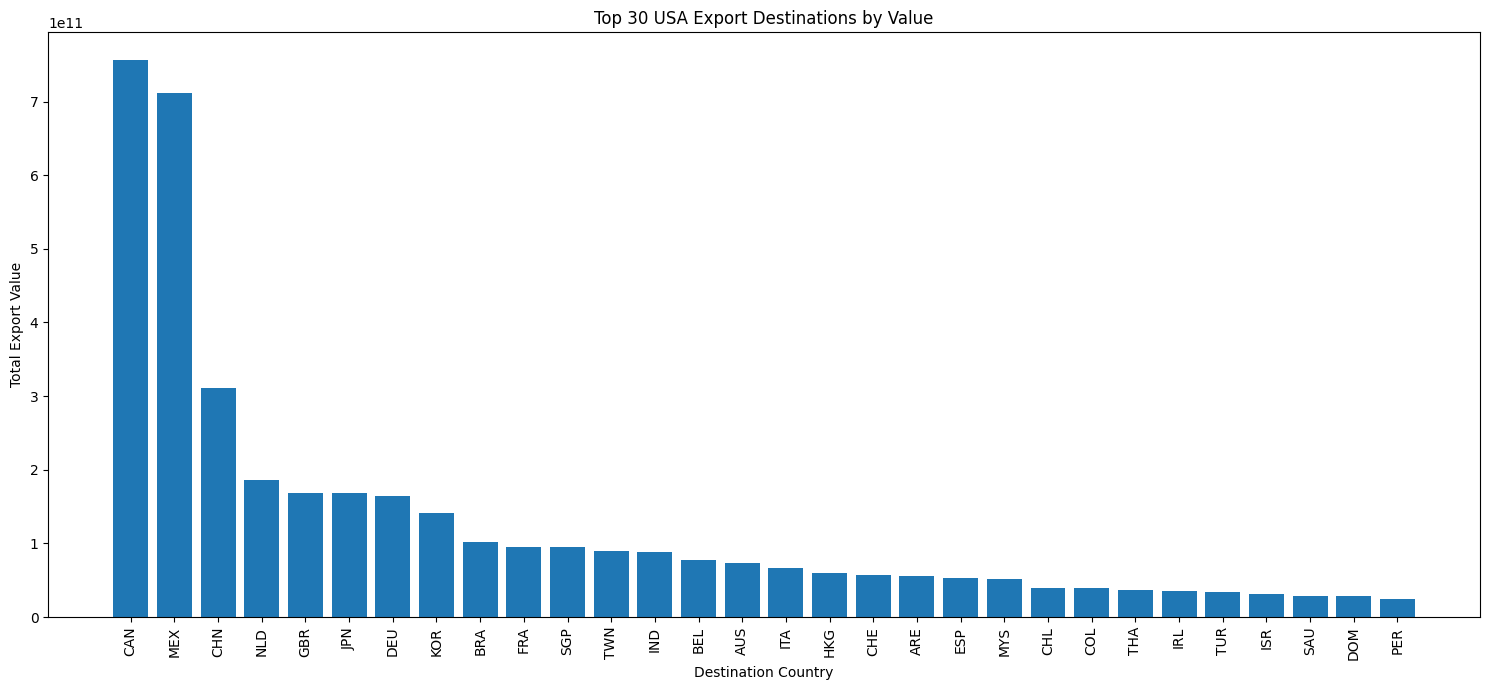

In [16]:
import matplotlib.pyplot as plt

usa_exports_summary = usa_trade_summary[usa_trade_summary['trade_flow'] == 'Exports']
top_30_usa_exports = usa_exports_summary.sort_values(by='value', ascending=False).head(30)

plt.figure(figsize=(15, 7))
plt.bar(top_30_usa_exports['destination'], top_30_usa_exports['value'])
plt.xlabel('Destination Country')
plt.ylabel('Total Export Value')
plt.title('Top 30 USA Export Destinations by Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize usa imports

### Subtask:
Create a bar chart showing the top USA import origins by total value.


**Reasoning**:
Filter the `usa_trade_summary` DataFrame for imports, sort by value, select the top 30, and create a bar chart to visualize the top 30 USA import origins.



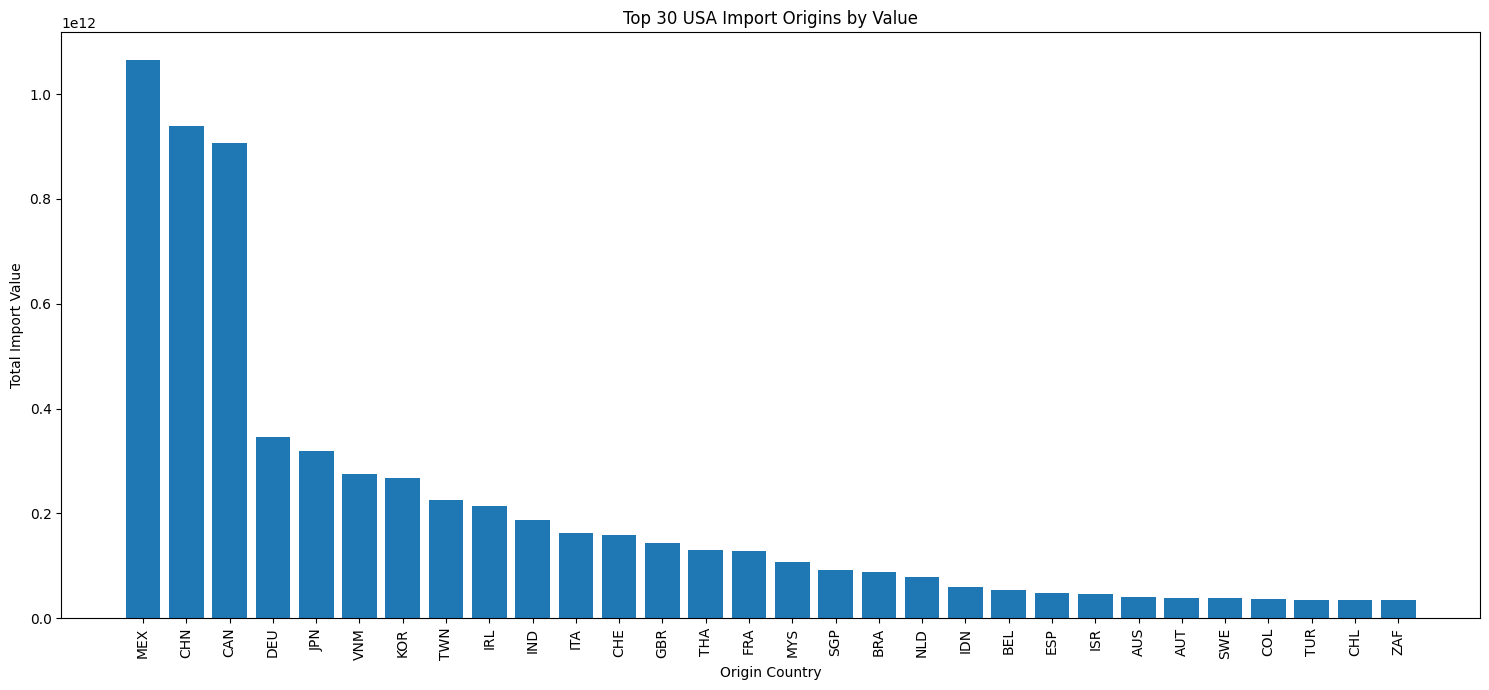

In [17]:
usa_imports_summary = usa_trade_summary[usa_trade_summary['trade_flow'] == 'Imports']
top_30_usa_imports = usa_imports_summary.sort_values(by='value', ascending=False).head(30)

plt.figure(figsize=(15, 7))
plt.bar(top_30_usa_imports['destination'], top_30_usa_imports['value'])
plt.xlabel('Origin Country')
plt.ylabel('Total Import Value')
plt.title('Top 30 USA Import Origins by Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 30 USA export destinations by value were identified and visualized using a bar chart.
*   The top 30 USA import origins by value were identified and visualized using a bar chart.

### Insights or Next Steps

*   Further analysis could involve examining the specific types of goods that constitute the majority of trade with the top partners.
*   Investigating the trends in trade value with these top partners over time could provide valuable insights into evolving trade relationships.


## Save Filtered Data

### Subtask:
Save the filtered DataFrame as a new parquet file.

**Reasoning**:
Save the filtered DataFrame to a new parquet file using the `to_parquet()` method, specifying the desired output file path.

In [18]:
output_path_filtered = os.path.join(directory_path, "trade_data_30_partners.parquet")
filtered_df.to_parquet(output_path_filtered)

print(f"Filtered data saved to {output_path_filtered}")

Filtered data saved to /content/drive/MyDrive/ai4trade/trade_data_30_partners.parquet
